# Project: Data Wrangling with Twitter data

## Table of Contents
<ul>    
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I'm going to load, clean and analyze the dataset from the Twitter account WeRateDogs®  that rates other people's dogs in a funny way.
<br>
I'll get data from csv and tsv files, from Udacity server and from Twitter using Tweepy to query Twitter's API.
<br>
I would like to know what are average posts and what are most 'likable'.<br>
WeRateDogs uses special  funny words for dogs of different ages. What words for dog stages does he use more and which posts with such words do people retweet or 'like' more.<br>
What dog breeds does he use in his posts more often? What dog breed were retweeted more often?


<a id='gather'></a>
## Gather

In [1]:
#Import libraries
import pandas as pd
import requests 
import os
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Archive table

In [2]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
df_archive.shape

(2356, 17)

#### Image predictions table

In [4]:
#download tsv file from Udacity's servers programmatically 
#using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode='wb') as file:
          file.write(response.content)

In [6]:
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Tweepy
create an API object to gather Twitter data.

In [7]:
consumer_key = '7GCntbM7icOGMHkkXjcQXfTkL'
consumer_secret = 'gZP0QgAihs5EoDZFi6PdfwkDfill046cWS1fRZajz84mgVgpxB'
access_token = '960852542-Q9H69Zz43N7xvQEAEY25il9Xl5P3ZAjVnfzc2HEe'
access_secret = 'xM4iTrao32Su1Ww2ygacFoZtfTBGpzGz0u5uEZLmqsMcl'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#get data from Twitter
id_list = df.tweet_id.astype(str)
tweets = []
error_count = 0
error_ids = []
for tweet_id in id_list:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweets.append(tweet._json)
    except tweepy.TweepError as e:
        print(e)
        error_ids.append(tweet_id)
error_ids

In [ ]:
#Write json data to file
with open('tweet_json.txt', 'w') as file:
    json.dump(tweets, file)

In [8]:
#Read json data from file
ls_tweets = []
with open('tweet_json.txt') as file:
    data = json.load(file)
    for p in data:
        ls_tweets.append({'tweet_id': p['id'],
                        'retweet_count': p['retweet_count'],
                        'favorite_count': p['favorite_count']})
        

    

In [9]:
len(ls_tweets)

2332

In [10]:
# create dataFrame from list 
df_tweets = pd.DataFrame(ls_tweets, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7675,36055
1,892177421306343426,5674,31097
2,891815181378084864,3763,23407
3,891689557279858688,7850,39325
4,891327558926688256,8445,37558


## Assess Data

#### Archive table

In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#Are columns in_reply_to_status_id, in_reply_to_user_id are the same records
df_archive.query('in_reply_to_status_id == in_reply_to_status_id and in_reply_to_user_id ==in_reply_to_user_id', engine='python').shape

(78, 17)

In [13]:
#Are columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
#are the same records
df_archive.query('retweeted_status_id ==retweeted_status_id and retweeted_status_user_id ==retweeted_status_user_id').shape

(181, 17)

#### Issues
##### df_ archive table
1) Original records have these columns equal NaN<br>
- in_reply_to_status_id<br>
- in_reply_to_user_id<br>
- retweeted_status_id<br>
- retweeted_status_user_id<br>
- retweeted_status_timestamp<br>

2) Columns to delete: *timestamp, source, expanded_urls* <br>
3) *rating_denominator* has some incorrect data, zeros, big numbers (decimal?)<br>
4) *rating_numerator* can be decimal like 13.5/10 tweet_id:883482846933004288<br>
  Some records have *rating_numerator* = 0 or >20<br>
5) *name* columns have some errors like name 'None' or 'a'. I'm not sure it will be used for analysis<br>
6) *doggo, floofer, pupper, puppo* columns have values only in 380 records vs 433 in *text* column<br>
7) Tidiness: *doggo, floofer, pupper, puppo* can be combined in one column<br>

In [14]:
#Checking for duplicated data
df_archive[df_archive.duplicated()].shape

(0, 17)

In [15]:
df_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [16]:
# strange rating_denominator values
df_archive[df_archive['rating_denominator'] !=10]['rating_denominator'].unique()

array([  0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40, 130,
       110,  16, 120,   2])

In [17]:
#name column
df_archive['name'].describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [18]:
df_archive['name'].value_counts().head(10)
#None, a - are not real names

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Penny       10
Lola        10
Tucker      10
Bo           9
Name: name, dtype: int64

In [19]:
# *doggo, floofer, pupper, puppo* columns
df_archive.query("doggo != 'None' or floofer != 'None' or pupper != 'None' or puppo != 'None'").shape

(380, 17)

In [20]:
print('Puppo:' + str(df_archive[df_archive['text'].str.contains("[Pp]uppo")].shape))
print('Doggo:' + str(df_archive[df_archive['text'].str.contains("[Dd]oggo")].shape))
print('Floofer:' + str(df_archive[df_archive['text'].str.contains("[Ff]loofer")].shape))
print('Pupper:' + str(df_archive[df_archive['text'].str.contains("[Pp]upper")].shape))
#sum = 433 - extract dog stages from text column 

Puppo:(38, 17)
Doggo:(106, 17)
Floofer:(10, 17)
Pupper:(279, 17)


#### Image prediction table

In [21]:
df_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [22]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Issues
##### df_predictions table

- *jpg_url, img_num* columns are not needed <br>
- p1, p2, p3* some breeds start with capital letter, some not<br>
- Names of columns p1,p2,p3, p1_conf,p2_conf,p3_conf, p1_dog,p2_dog,p3_dog re not obvious<br>
- Some first chose predictions are not dogs<br>
- For analysis only one most probable prediction required
- Some tweets do not have dog breed prediction, all p_dog flags are false

In [23]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
#df_predictions.p1.value_counts()
#df_predictions.p2.value_counts()
df_predictions.p3.value_counts().head(5)

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
Name: p3, dtype: int64

In [26]:
#Tweets in archive table and not in prediction table
len(list(set(df_archive.tweet_id) - set(df_predictions.tweet_id)))

281

In [27]:
#Are there errors in confidence intervals?
print(len(df_predictions[df_predictions.p1_conf < df_predictions.p2_conf]))
print(len(df_predictions[df_predictions.p1_conf < df_predictions.p3_conf]))

0
0


In [28]:
#Some first chose predictions are not dogs
len(df_predictions[df_predictions.p1_dog==False])

543

In [29]:
#records without dog breed 
len(df_predictions[((df_predictions.p1_dog==False)&(df_predictions.p2_dog==False)&(df_predictions.p3_dog==False))])

324

#### Tweepy table

In [30]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null int64
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [31]:
df_tweets.retweet_count.describe()

count     2332.000000
mean      2692.102058
std       4553.026319
min          1.000000
25%        544.750000
50%       1260.500000
75%       3128.000000
max      77473.000000
Name: retweet_count, dtype: float64

In [32]:
df_tweets.favorite_count.describe()

count      2332.000000
mean       7525.440395
std       11685.867567
min           0.000000
25%        1311.250000
50%        3273.500000
75%        9218.250000
max      155529.000000
Name: favorite_count, dtype: float64

#### Issues
##### df_tweets table
- Merge df_tweets and df_archive table. df_tweets is just additional info about the same tweets <br>
- Some tweets were deleted, df_tweets has no info about them, ids are in error_ids list

## Clean

##### df_archive_copy table
1) Columns to delete: *timestamp, source, expanded_urls, name*<br>
2) Delete replies and retweets<br>
Delete records with not null data in these columns:
- *in_reply_to_status_id*
- *in_reply_to_user_id*
- *retweeted_status_id*
- *retweeted_status_user_id*
- *retweeted_status_timestamp*

Drop those columns <br>

3) Clean *rating_denominator* column
- Set *rating_denominator* = 10 where rating_denominator !=10 but text column has correct rating
- Records with *rating_denominator* !=10 are not ratings of one dog, drop these records, drop *rating_denominator* column

4) Clean *rating_numerator* column
- Change type of *rating_numerator* as decimal
- Extract *rating_numerator* from tweet text

5)Clean and combine *doggo, floofer, pupper, puppo* columns
- Extract dog stage from tweet text for *doggo, floofer, pupper, puppo* columns
- Convert all dog stages name to lowercase
- **Tidiness:** Combine *doggo, floofer, pupper, puppo* in one dog_stage column 
- Drop columns *doggo, floofer, pupper, puppo, text, name*

##### df_predictions_copy table
1) Columns to delete: *jpg_url,img_num*<br>
2) Rename columns *p1,p2,p3, p1_conf,p2_conf,p3_conf, p1_dog,p2_dog,p3_dog*<br>
3) Convert all columns with the dog breeds to lowercase<br>
4) Choose only one most probable prediction with dog flag = True, drop other predictions columns<br>
5) Drop all records where dog breed is not predicted (all dog flags = False)<br>

##### Merge all three tables into df_all_tweets
**Tidiness:**<br> 
Some tweets were deleted from twitter and some archive records were cleaned as invalid.<br>
Predictions dataset has only records for which dog breed was identified.<br>
Only records presented in all three tables will go into the merged table


In [35]:
#Create copies of the tables
df_archive_copy = df_archive.copy()
df_predictions_copy = df_predictions.copy()
df_tweets_copy = df_tweets.copy()

##### df_archive_copy table
Columns to delete: *timestamp, source, expanded_urls* <br>

In [36]:
#Drop columns
df_archive_copy.drop(['timestamp', 'source', 'expanded_urls', 'name'], axis=1, inplace=True)
#Test
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 239.4+ KB


##### Delete replies and retweets
Delete not null data in these columns:<br>
- in_reply_to_status_id<br>
- in_reply_to_user_id<br>
- retweeted_status_id<br>
- retweeted_status_user_id<br>
- retweeted_status_timestamp<br>

Drop those columns <br>

In [37]:
#drop replies
df_archive_copy.drop(index = df_archive_copy[df_archive_copy.in_reply_to_status_id.isnull()==False].index, inplace=True)

In [38]:
#drop retweets 
df_archive_copy.drop(index = df_archive_copy[df_archive_copy.retweeted_status_id.isnull()==False].index, inplace=True)

In [39]:
#Test
print(df_archive_copy[df_archive_copy.in_reply_to_status_id.isnull()==False].shape)
print(df_archive_copy[df_archive_copy.in_reply_to_user_id.isnull()==False].shape)
print(df_archive_copy[df_archive_copy.retweeted_status_user_id.isnull()==False].shape)
print(df_archive_copy[df_archive_copy.retweeted_status_id.isnull()==False].shape)
print(df_archive_copy[df_archive_copy.retweeted_status_timestamp.isnull()==False].shape)
#all should be zero

(0, 13)
(0, 13)
(0, 13)
(0, 13)
(0, 13)


In [40]:
#Drop those columns, because they are all equal null for original tweets records
df_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [41]:
#Test
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null int64
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(5)
memory usage: 147.4+ KB


##### Clean *rating_denominator* column
- Set *rating_denominator* = 10 where rating_denominator !=10 but text column has correct rating
- records with *rating_denominator* !=10 are not ratings of one dog, drop these recors, drop *rating_denominator* column<br>

In [42]:
#rating_denominator !=10 but text column has correct rating
df_archive_copy[(df_archive_copy.rating_denominator !=10) & (df_archive_copy.text.str.contains(r"/10"))].shape

(5, 8)

In [43]:
#Number of problematic records
df_archive_copy[df_archive_copy.rating_denominator !=10].shape

(17, 8)

In [44]:
#Set rating_denominator = 10 
#where rating_denominator !=10 but text column has correct rating
df_archive_copy.loc[(df_archive_copy.rating_denominator !=10) & (df_archive_copy.text.str.contains(r"/10")), ['rating_denominator']] = 10

In [45]:
#Test
len(df_archive_copy[df_archive_copy.rating_denominator !=10])

12

In [46]:
#drop records which do not have rating of one dog
#denominator=7 -> no rating
#denominator>10-> multiple dogs
df_archive_copy.drop(index = df_archive_copy[df_archive_copy.rating_denominator !=10].index, inplace=True)

In [47]:
#Test: check all recors for rating_denominator and rating number inside text column
print(df_archive_copy[(df_archive_copy.rating_denominator ==10) & (df_archive_copy.text.str.contains(r"/10"))].shape)
print(df_archive_copy.shape)
#should be the same

(2085, 8)
(2085, 8)


In [48]:
# rating_denominator = 10 in all records, so we can drop the column
df_archive_copy.drop(['rating_denominator'], axis=1, inplace=True)

##### Clean *rating_numerator* column
- Change type of *rating_numerator* as decimal
- Extract *rating_numerator* from tweet text

In [49]:
df_archive_copy.rating_numerator.astype(str).unique()

array(['13', '12', '14', '5', '11', '6', '10', '0', '75', '27', '3', '7',
       '8', '9', '4', '1776', '50', '26', '2', '1', '420'], dtype=object)

In [50]:
#Extract rating_numerator from tweet text and compare with column
#Change type of rating_numerator as decimal
df_archive_copy['num'] = df_archive_copy.text.str.extract('(\d+\.?\d*)/10').astype(float)
df_archive_copy['rating_numerator'] = df_archive_copy.rating_numerator.astype(float)

In [51]:
#Wrong data in rating_numerator column
df_archive_copy.query('rating_numerator != num')[['tweet_id','text', 'rating_numerator', 'num']]

,tweet_id,text,rating_numerator,num
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5.0,13.50
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75.0,9.75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,11.27
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9.0,14.00
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4.0,13.00
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50.0,11.00
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,7.0,10.00
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26.0,11.26
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,1.0,9.00


In [52]:
#column num has correct values, so I just update rating_numerator with num
df_archive_copy['rating_numerator'] = df_archive_copy['num']
df_archive_copy.drop(['num'], axis=1, inplace=True)

In [53]:
#Leave to check rating_numerator extreme values to after merging with predictions data
df_archive_copy[df_archive_copy['rating_numerator'] > 25]

,tweet_id,text,rating_numerator,doggo,floofer,pupper,puppo
979,749981277374128128,This is Atticus. He's quite simply America af....,1776.0,None,None,None,None
2074,670842764863651840,After so many requests... here you go.\n\nGood...,420.0,None,None,None,None


In [54]:
df_archive_copy.shape

(2085, 7)

In [55]:
df_archive_copy[df_archive_copy.rating_numerator == 0]
#This is not a photo of a dog with a rating
#Drop this recird

,tweet_id,text,rating_numerator,doggo,floofer,pupper,puppo
315,835152434251116546,When you're so blinded by your systematic plag...,0.0,None,None,None,None


In [56]:
df_archive_copy.drop(index=315, inplace=True)

In [57]:
df_archive_copy.shape

(2084, 7)

##### Clean *doggo, floofer, pupper, puppo* columns
- Extract dog stage from tweet text for *doggo, floofer, pupper, puppo* columns
- Convert all dog stages name to lowercase
- Combine *doggo, floofer, pupper, puppo* in one dog_stage column 
- Drop columns *doggo, floofer, pupper, puppo, text*

In [58]:
#Not null dog stage data
df_archive_copy.query("doggo != 'None' or floofer != 'None' or pupper != 'None' or puppo != 'None'").shape

(336, 7)

In [59]:
#Extract dog stage from tweet text
df_archive_copy['pupper'] = df_archive_copy.text.str.extract('([Pp]upper)');
df_archive_copy['doggo'] = df_archive_copy.text.str.extract('([Dd]oggo)');
df_archive_copy['floofer'] = df_archive_copy.text.str.extract('([Ff]loofer)');
df_archive_copy['puppo'] = df_archive_copy.text.str.extract('([Pp]uppo)');

In [60]:
#Combine dog stages in one column 
df_archive_copy.doggo.replace(np.nan, '', regex=True, inplace=True)
df_archive_copy.puppo.replace(np.nan, '', regex=True, inplace=True)
df_archive_copy.floofer.replace(np.nan, '', regex=True, inplace=True)
df_archive_copy.pupper.replace(np.nan, '', regex=True, inplace=True)

In [61]:
#Convert all dog stages name to lowercase
df_archive_copy['pupper'] = df_archive_copy.pupper.str.lower()
df_archive_copy['doggo'] = df_archive_copy.doggo.str.lower()
df_archive_copy['floofer'] = df_archive_copy.floofer.str.lower()
df_archive_copy['puppo'] = df_archive_copy.puppo.str.lower()

In [62]:
df_archive_copy['dog_stage'] = df_archive_copy['doggo']+ df_archive_copy['puppo'] + df_archive_copy['floofer'] + df_archive_copy['pupper'] 

In [63]:
df_archive_copy.dog_stage.value_counts()

                1720
pupper           238
doggo             77
puppo             28
floofer            9
doggopupper        9
doggopuppo         2
doggofloofer       1
Name: dog_stage, dtype: int64

In [64]:
# multiple stages: all puppers are doggos, but not all doggos are puppers
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'pupper'
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'puppo'
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'floofer'

In [65]:
#Test
df_archive_copy.dog_stage.value_counts()

           1720
pupper      247
doggo        77
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [68]:
#drop columns we don't need any more
df_archive_copy.drop(['pupper','doggo','puppo','floofer', 'text'], axis=1, inplace=True)

In [69]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id            2084 non-null int64
rating_numerator    2084 non-null float64
dog_stage           2084 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 65.1+ KB


##### df_predictions table
- Columns to delete: *jpg_url, img_num*<br>
- Rename columns p1,p2,p3, p1_conf,p2_conf,p3_conf, p1_dog,p2_dog,p3_dog<br>
- Convert dog breeds to lowercase<br>
- Choose only one most probable prediction with dog flag = True, drop other predictions<br>
- Drop all records where dog breed is not predicted<br>

In [70]:
#Drop jpg_url, img_num columns
df_predictions_copy.drop(['jpg_url', 'img_num'], axis=1, inplace=True)
#Test
df_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 119.6+ KB


In [71]:
#rename columns
df_predictions_copy = df_predictions_copy.rename(columns={'p1': 'dog_breed', 'p1_conf': 'conf_int', 'p1_dog': 'is_dog', 'p2': 'dog_breed2', 'p2_conf': 'conf_int2', 'p2_dog': 'is_dog2', 'p3': 'dog_breed3', 'p3_conf': 'conf_int3', 'p3_dog': 'is_dog3'})

In [72]:
#Convert dog breeds to lowercase
df_predictions_copy['dog_breed'] = df_predictions_copy.dog_breed.str.lower()
df_predictions_copy['dog_breed2'] = df_predictions_copy.dog_breed2.str.lower()
df_predictions_copy['dog_breed3'] = df_predictions_copy.dog_breed3.str.lower()

In [73]:
#Test
df_predictions_copy.head()

,tweet_id,dog_breed,conf_int,is_dog,dog_breed2,conf_int2,is_dog2,dog_breed3,conf_int3,is_dog3
0,666020888022790149,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [74]:
#Number non dogs
len(df_predictions_copy[df_predictions_copy['is_dog'] == False])

543

In [75]:
#if first prediction isn't a dog, use second or third if exists
def choose_dog(row):
    if (row['is_dog'] == False & row['is_dog2']):
        row['dog_breed'] = row['dog_breed2']
        row['conf_int'] = row['conf_int2']
        row['is_dog'] = row['is_dog2']
    if (row['is_dog'] == False & row['is_dog3']):
        row['dog_breed'] = row['dog_breed3']
        row['conf_int'] = row['conf_int3']
        row['is_dog'] = row['is_dog3']
    return row['is_dog'], row['conf_int'], row['is_dog'] 

df_predictions_copy[['is_dog','conf_int','is_dog']] = df_predictions_copy.apply(choose_dog, axis=1, result_type="expand")

In [76]:
#Test Number non dogs
len(df_predictions_copy[df_predictions_copy['is_dog'] == False])

324

In [77]:
#Drop all records where dog breed is not predicted
df_predictions_copy.drop(index=df_predictions_copy[df_predictions_copy['is_dog'] == False].index, inplace=True)

In [78]:
#Test Number non dogs
len(df_predictions_copy[df_predictions_copy['is_dog'] == False])

0

In [79]:
#drop second and third predictions as less probable
#is_dog column has the same value True for all the records and can be deleted
df_predictions_copy.drop(['dog_breed2','conf_int2','is_dog2','dog_breed3', 'conf_int3', 'is_dog3', 'is_dog'], axis=1, inplace=True)

In [80]:
#Test
df_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id     1751 non-null int64
dog_breed    1751 non-null object
conf_int     1751 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 54.7+ KB


##### Merge all three tables into df_all_tweets
Some tweets were deleted from twitter and some archive records were cleaned as invalid.<br>
Predictions data for which dog breed was identified.<br>
Only records presented in all three tables will go to the merged table

In [81]:
#inner join for tweepy and archive data
df_all_tweets = pd.merge(df_archive_copy, df_tweets_copy, on='tweet_id', how='inner')

In [82]:
#Test
df_all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 5 columns):
tweet_id            2077 non-null int64
rating_numerator    2077 non-null float64
dog_stage           2077 non-null object
retweet_count       2077 non-null int64
favorite_count      2077 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 97.4+ KB


In [83]:
#inner join for tweepy and archive data and breed prediction data
df_all_tweets = pd.merge(df_all_tweets, df_predictions_copy, on='tweet_id', how='inner')

In [84]:
df_all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 0 to 1646
Data columns (total 7 columns):
tweet_id            1647 non-null int64
rating_numerator    1647 non-null float64
dog_stage           1647 non-null object
retweet_count       1647 non-null int64
favorite_count      1647 non-null int64
dog_breed           1647 non-null object
conf_int            1647 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 102.9+ KB


In [85]:
#Check on extreme rating_numerator values
df_all_tweets[df_all_tweets['rating_numerator'] >25]
#They were not dogs with identified breed 

,tweet_id,rating_numerator,dog_stage,retweet_count,favorite_count,dog_breed,conf_int


<a id='eda'></a>
## Exploratory Data Analysis

In [86]:
#Store the clean DataFrame(s) in a CSV file
df_all_tweets.to_csv('twitter_archive_master.csv', index = False)

#### 1. What dogs and posts are average by popularity and rating on WeRateDogs is a Twitter account? What tweets were favorited by most users?

In [87]:
df_all_tweets.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,conf_int
count,1.647000e+03,1647.000000,1647.000000,1647.000000,1647.000000
mean,7.392951e+17,10.826825,2512.455373,8619.803279,0.550191
std,6.801087e+16,1.757739,4564.767335,12666.328782,0.298633
min,6.660209e+17,2.000000,11.000000,70.000000,0.000010
25%,6.773302e+17,10.000000,559.500000,1940.500000,0.304538
50%,7.141414e+17,11.000000,1243.000000,4028.000000,0.548907
75%,7.931581e+17,12.000000,2845.000000,10651.500000,0.821876
max,8.921774e+17,14.000000,77473.000000,155529.000000,0.999956


Mean rating = 10.83<br>
Mean retweet_count = 2512<br>
Mean favorite_count = 8620<br>

In [88]:
#Tweet with Dogs that are averge
df_all_tweets.query('rating_numerator == 11 and retweet_count > 2400 and retweet_count<2600 and favorite_count > 8500 and favorite_count<8700')

,tweet_id,rating_numerator,dog_stage,retweet_count,favorite_count,dog_breed,conf_int
573,759447681597108224,11.0,,2465,8508,kuvasz,0.223148


In [89]:
#What tweets were favorited by most users
df_all_tweets[['tweet_id', 'favorite_count']].sort_values('favorite_count',ascending=False).head()

,tweet_id,favorite_count
676,744234799360020481,155529
270,822872901745569793,132534
353,807106840509214720,120123
99,866450705531457537,116000
704,739238157791694849,114925


These are 5 most 'liked' posts, three of them are videos!

#### 2. What doggolingo stages are more common in posts and what on average are retweeted and 'liked' more?

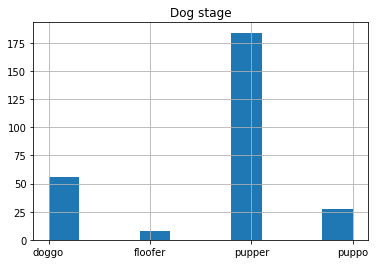

In [90]:
dog_stage = df_all_tweets[df_all_tweets.dog_stage !=''].groupby('dog_stage', as_index=False).mean().sort_values('retweet_count', ascending=False)
df_all_tweets[df_all_tweets.dog_stage !=''].dog_stage.hist();
plt.title('Dog stage');

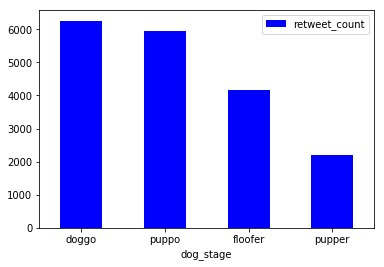

In [91]:
dog_stage.plot.bar(x='dog_stage', y='retweet_count', color='b');
plt.xticks(rotation='horizontal');

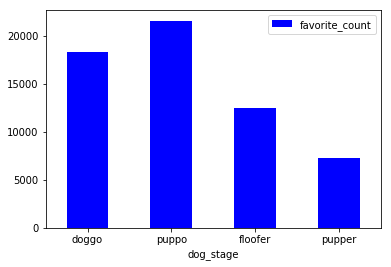

In [92]:
dog_stage.plot.bar(x='dog_stage', y='favorite_count', color='b');
plt.xticks(rotation='horizontal');

Doggolingvo slang word 'pupper' (means puppy) is used more often by WeRateDogs in the twitter posts. But these posts on average are least retweeted and 'liked'. Follower are much more ergar to 'like' or retweet posts with words 'doggo' or 'puppo'

#### 3. What dog breeds are posted more often? What dog breed were retweeted more often?

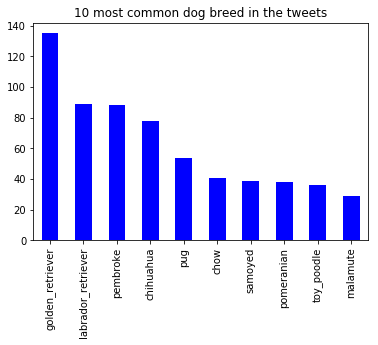

In [96]:
#Distribution of dog_breeds
df_all_tweets['dog_breed'].value_counts().head(10).plot(kind='bar', color='b');
plt.title('10 most common dog breed in the tweets');

In [97]:
#Most retweeted dog breeds
df_all_tweets.groupby('dog_breed', as_index=False).sum().sort_values('retweet_count', ascending=False)[['dog_breed','retweet_count']].head(5)

,dog_breed,retweet_count
78,golden_retriever,442406.0
110,labrador_retriever,305610.0
139,pembroke,247443.0
47,chihuahua,198932.0
154,samoyed,153716.0


WeRateDogs realy likes golden_retriever and labrador_retriever dog breeds. He posted them more often, and his followers retweet them most too.

<a id='conclusions'></a>
## Conclusion

In this project I was working with the data from the Twitter account WeRateDogs® that rates other people's dogs in a funny way. Later I combined tweets data with image prediction data made on photos from the posts.<br>

First, I gathered data from 3 different places:
 - tweets archive data was downloaded from csv file
 - tweet image predictions data was downloaded as tsv file from Udacity's servers programmatically using the Requests library
 - additional tweet data (retweet count and favorite count) was downloaded from Twitter using Tweepy to query Twitter's API. Using tweet_id from archive data I requested tweet data from Twitter programmatically in Json format and stored the date in tweet_json.txt file. Later I downloaded data back and gathered retweet count and favorite count into the panda dataframe.

Then I assessed gathered data both visually and programmatically for all three datasets separately and cleaned it.<br>

Analysing the resulting dataset I learnt about average tweet and about most popular (liked) tweets.
Word 'pupper' (means puppy) is used more often in tweets, but on average it's   least retweeted or 'liked'. Followers are much more eager to 'like' or retweet posts with words 'doggo' or 'puppo'.

Breeds golden_retriever and labrador_retriever are most common in posts and users retweet them most too.

<a id='ref'></a>
## References

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
<br>
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
<br>
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object<br>
https://stackoverflow.com/questions/37863660/pandas-dataframe-query-fetch-not-null-rows-pandas-equivalent-to-sql-is-no<br>
https://docs.python.org/3/library/re.html<br>
